In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
import numpy as np
import pandas as pd
import os
import seaborn as sns
%pylab inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv(r"C:\Users\91954\Downloads\listings.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [3]:
data.shape

(3818, 92)

# Missing Value Proprtions

<AxesSubplot:title={'center':'missing values per columns, %'}>

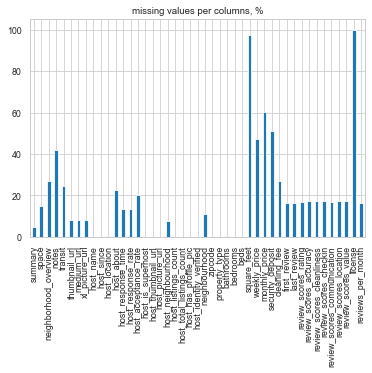

In [99]:
#Find missing value percetnage
listings_missing=data.isnull().mean()*100

#Filter out columns, which have missing values
listings_with_nan=listings_missing[listings_missing>0]

#plot the results
listings_with_nan.plot.bar(title='missing values per columns, %')

In [100]:
listings_with_nan[listings_with_nan>40]

notes                42.063908
square_feet          97.459403
weekly_price         47.380828
monthly_price        60.267156
security_deposit     51.126244
license             100.000000
dtype: float64

In [4]:
#Dropping non informative columns
data=data.drop(['xl_picture_url', 'host_id', 'host_url', 'host_name','id', 'listing_url', 'scrape_id',
     'name', 'summary','thumbnail_url', 'medium_url', 'picture_url','host_thumbnail_url', 'host_picture_url',
    'city', 'state', 'country_code', 'country','requires_license', 'street','license','experiences_offered',
     'host_location', 'host_about','space','description','market','smart_location','transit','notes','square_feet',       
     'weekly_price',      
    'monthly_price',     
    'license'], axis=1)

In [5]:
data.isnull().sum()


last_scraped                           0
neighborhood_overview               1032
host_since                             2
host_response_time                   523
host_response_rate                   523
host_acceptance_rate                 773
host_is_superhost                      2
host_neighbourhood                   300
host_listings_count                    2
host_total_listings_count              2
host_verifications                     0
host_has_profile_pic                   2
host_identity_verified                 2
neighbourhood                        416
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
zipcode                                7
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          1
room_type                              0
accommodates                           0
bathrooms                             16
bedrooms        

In [6]:
data.dropna(how='any')

,last_scraped,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,2016-01-04,"Queen Anne is a wonderful, truly functional vi...",2013-02-21,within an hour,98%,100%,t,Queen Anne,6.0,6.0,...,10.0,10.0,10.0,WASHINGTON,f,strict,t,t,6,1.48
2,2016-01-04,Upper Queen Anne is a charming neighborhood fu...,2014-06-12,within a few hours,67%,100%,f,Queen Anne,2.0,2.0,...,10.0,10.0,10.0,WASHINGTON,f,strict,f,f,2,1.15
7,2016-01-04,We are centrally located between Downtown and ...,2012-10-30,within an hour,100%,100%,t,Queen Anne,5.0,5.0,...,10.0,9.0,10.0,WASHINGTON,f,strict,t,t,5,4.73
9,2016-01-04,"Queen Anne is a wonderful, truly functional vi...",2013-02-21,within an hour,98%,100%,t,Queen Anne,6.0,6.0,...,10.0,10.0,9.0,WASHINGTON,f,strict,t,t,6,1.55
11,2016-01-04,I am located in the Upper Queen Anne neighborh...,2013-01-06,within a few hours,100%,100%,f,Queen Anne,1.0,1.0,...,10.0,10.0,9.0,WASHINGTON,f,strict,f,f,1,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,2016-01-04,Upper Fremont is a vibrant neighborhood that o...,2011-05-07,within a few hours,100%,100%,t,Fremont,1.0,1.0,...,10.0,10.0,10.0,WASHINGTON,f,strict,f,f,1,2.34
3805,2016-01-04,One of the most fun neighborhoods in Seattle. ...,2012-11-05,within an hour,100%,100%,f,Fremont,1.0,1.0,...,10.0,10.0,10.0,WASHINGTON,f,strict,f,f,1,3.95
3808,2016-01-04,Fremont is wonderful; you will love it here. T...,2013-08-05,within a few hours,100%,100%,f,Fremont,2.0,2.0,...,10.0,10.0,9.0,WASHINGTON,f,strict,f,f,2,1.15
3810,2016-01-04,We love that Fremont is so centrally located t...,2011-11-07,within an hour,100%,100%,f,Fremont,1.0,1.0,...,10.0,10.0,8.0,WASHINGTON,f,strict,f,f,1,1.56


In [104]:
data.head()

,last_scraped,neighborhood_overview,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2016-01-04,NaN,2011-08-11,within a few hours,96%,100%,f,Queen Anne,3.0,3.0,...,10.0,9.0,10.0,WASHINGTON,f,moderate,f,f,2,4.07
1,2016-01-04,"Queen Anne is a wonderful, truly functional vi...",2013-02-21,within an hour,98%,100%,t,Queen Anne,6.0,6.0,...,10.0,10.0,10.0,WASHINGTON,f,strict,t,t,6,1.48
2,2016-01-04,Upper Queen Anne is a charming neighborhood fu...,2014-06-12,within a few hours,67%,100%,f,Queen Anne,2.0,2.0,...,10.0,10.0,10.0,WASHINGTON,f,strict,f,f,2,1.15
3,2016-01-04,NaN,2013-11-06,NaN,NaN,NaN,f,Queen Anne,1.0,1.0,...,NaN,NaN,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,2016-01-04,We are in the beautiful neighborhood of Queen ...,2011-11-29,within an hour,100%,NaN,f,Queen Anne,2.0,2.0,...,10.0,9.0,9.0,WASHINGTON,f,strict,f,f,1,0.89


# Delete Symbols and convert them into numeric type

In [105]:
data['host_response_rate']=data['host_response_rate'].str.replace('%','')
data['host_acceptance_rate']=data['host_acceptance_rate'].str.replace('%','')

In [106]:
data['host_acceptance_rate']=pd.to_numeric(data['host_acceptance_rate'])
data['host_response_rate']=pd.to_numeric(data['host_response_rate'])


In [11]:
data['price']=data.price.str.replace('$','')

In [12]:
l=['security_deposit','cleaning_fee','extra_people']

In [13]:
for i in l:
    data[i]=data[i].str.replace('$','')
    data[i]=data[i].str.replace(',','')
    data[i]=pd.to_numeric(data[i])

In [14]:
 data['price']=data['price'].str.replace(',','')

In [15]:
data['price']=pd.to_numeric(data['price'])

### Checking for outliers and error

<Figure size 1008x432 with 0 Axes>

<AxesSubplot:xlabel='price'>

<AxesSubplot:xlabel='price'>

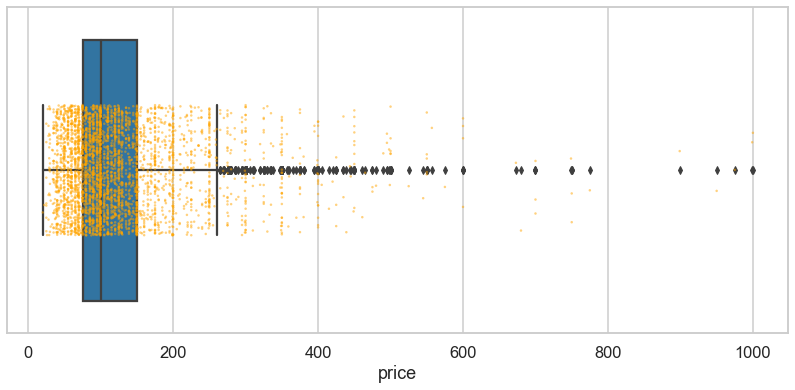

In [70]:
sns.set_context('talk')
sns.set_style('whitegrid')
plt.figure(figsize=(14,6))
sns.boxplot(x='price',data=data,orient='h')
sns.stripplot(x='price',data=data,color='orange',alpha=0.5,jitter=0.2,size=2.5) #scatter plot for boxplot shows where most data is


<AxesSubplot:xlabel='security_deposit'>

<AxesSubplot:xlabel='security_deposit'>

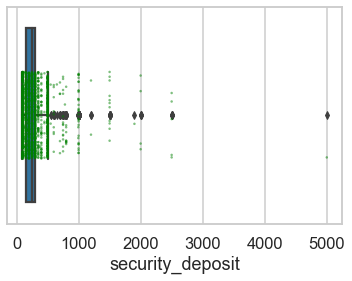

<AxesSubplot:xlabel='cleaning_fee'>

<AxesSubplot:xlabel='cleaning_fee'>

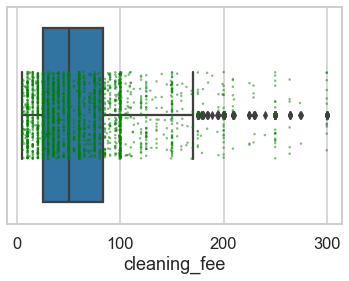

<AxesSubplot:xlabel='extra_people'>

<AxesSubplot:xlabel='extra_people'>

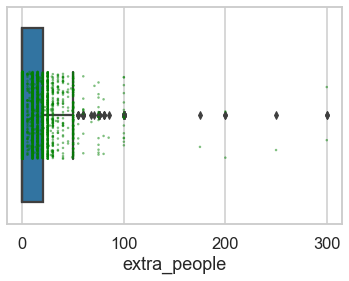

In [72]:
for j in l:
    sns.boxplot(x=j,data=data,orient='h')
    sns.stripplot(x=j,data=data,color='green',alpha=0.5,jitter=0.2,size=2.5)
    plt.show()

In [22]:
data=data[data['price']<800]

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

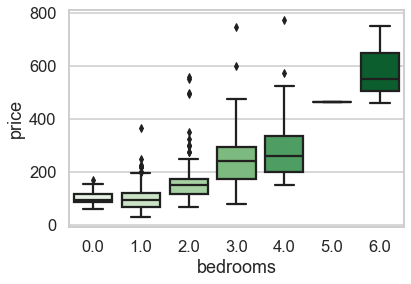

In [23]:
sns.boxplot(x='bedrooms',y='price',palette='Greens',data=data)

In [112]:
data=data.drop(data[(data['zipcode']=='99\n98122')].index)

In [113]:
lst=['last_scraped','host_since','last_review','first_review']

In [75]:
for o in lst:
    data[o]=pd.to_datetime(data[o])

In [76]:
data['host_period']=data.last_scraped - data.host_since

In [77]:
data['host_period']=data['host_period'].dt.days

In [78]:
data['review_period']=data['last_review']-data['first_review']
data['review_period']= data['review_period'].dt.days

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

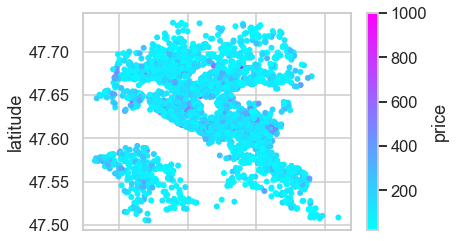

In [79]:
data.plot(kind='scatter',x='longitude',y='latitude',c='price',cmap='cool')

# Plot property type and price

In [114]:
data['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='price', ylabel='property_type'>

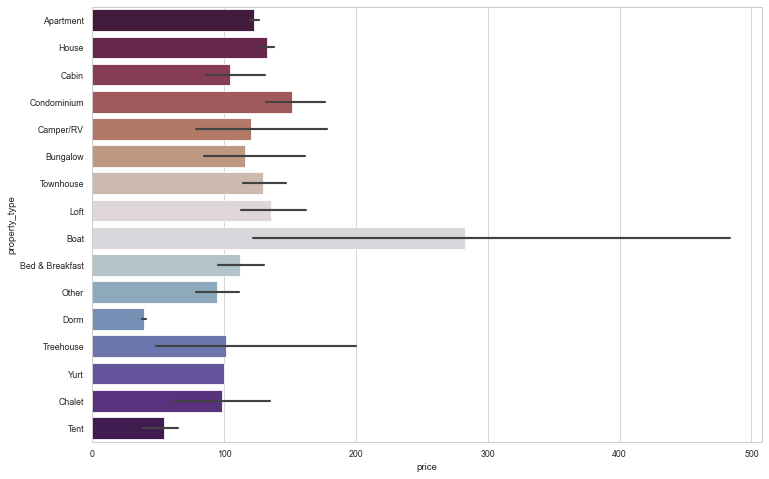

In [115]:
plt.figure(figsize=(12,8))
sns.barplot(x='price',y='property_type',palette='twilight_shifted_r',data=data)

# Plot room types and price

In [116]:
roomtype_and_price=data.groupby('room_type').agg({"price":"mean"}).reset_index()

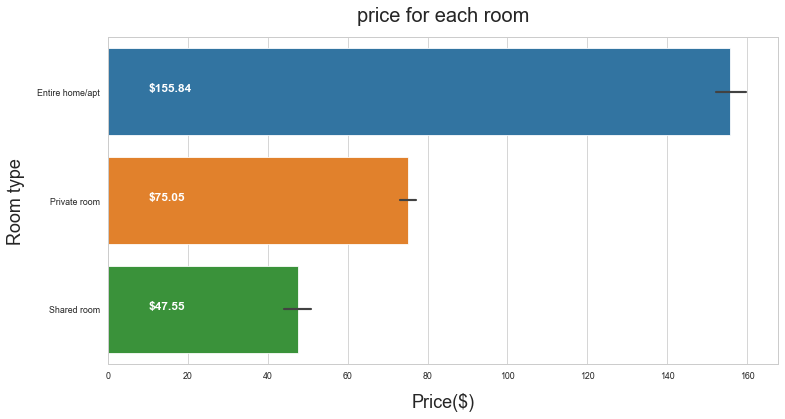

In [117]:
sns.set_context('paper')
plt.figure(figsize=(12,6))
ax=sns.barplot(x='price',y='room_type',data=data,orient='h')
plt.title("price for each room",fontsize=20,y=1.03)
plt.xlabel('Price($)',fontsize=18,labelpad=12)
for index, row in roomtype_and_price.iterrows():
    ax.text(10,index,'$'+str(round(row['price'],2)),color='white',weight='bold',fontsize=12)
plt.ylabel("Room type",fontsize=18,labelpad=12);

Entire home or apartment has the highest price compared to shared room and private room.

# Finding relation between property type and price

In [118]:
propertype_and_price=data.groupby("property_type").agg({'price':'mean'}).reset_index()

In [119]:
propertype_and_price[propertype_and_price['price']>200]

,property_type,price
2,Boat,282.375


In [121]:
airbnb_propertype_number = dict(data.property_type.value_counts())
airbnb_propertype_number

{'House': 1732,
 'Apartment': 1708,
 'Townhouse': 118,
 'Condominium': 91,
 'Loft': 40,
 'Bed & Breakfast': 37,
 'Other': 22,
 'Cabin': 21,
 'Camper/RV': 13,
 'Bungalow': 13,
 'Boat': 8,
 'Tent': 5,
 'Treehouse': 3,
 'Dorm': 2,
 'Chalet': 2,
 'Yurt': 1}

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='neighbourhood', ylabel='count'>

Text(0.5, 0, 'Neighbouhood')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 [Text(0, 0, 'Queen Anne'),
  Text(1, 0, 'Ballard'),
  Text(2, 0, 'Phinney Ridge'),
  Text(3, 0, 'Fremont'),
  Text(4, 0, 'Lower Queen Anne'),
  Text(5, 0, 'Westlake'),
  Text(6, 0, 'Wallingford'),
  Text(7, 0, 'Green Lake'),
  Text(8, 0, 'Minor'),
  Text(9, 0, 'Madrona'),
  Text(10, 0, 'Harrison/Denny-Blaine'),
  Text(11, 0, 'Leschi'),
  Text(12, 0, 'University District'),
  Text(13, 0, 'Roosevelt'),
  Text(14, 0, 'Madison Park'),
  Text(15, 0, 'Capitol Hill'),
  Text(16, 0, 'Atlantic'),
  Text(17, 0, 'North Beacon Hill'),
  Text(18, 0, 'Central Business District'),
  Text(19, 0, 'Pike Place Market'),
  Text(20, 0, 'Pike Mark

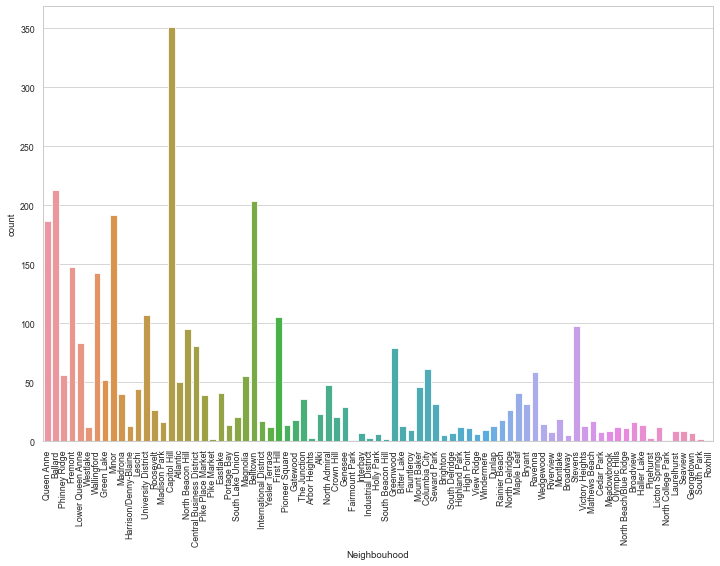

In [122]:
plt.figure(figsize=(12,8))
sns.countplot(x='neighbourhood',data=data,orient='h')
plt.xlabel('Neighbouhood')
plt.xticks(rotation=90)
plt.show()

# What Neighbourhood has most Airbnb listings? 

Capitol hill is the area where most airbnb listings are present

# Most expensive area?

In [93]:
most_expensive_neighbourhood= data.groupby('neighbourhood').agg({'price':'median'}).reset_index()

In [94]:
most_expensive_neighbourhood[most_expensive_neighbourhood.price>350]

,neighbourhood,price
17,Fairmount Park,370.0


<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

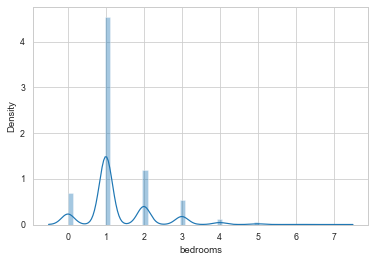

In [95]:
sns.distplot(data['bedrooms'])

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

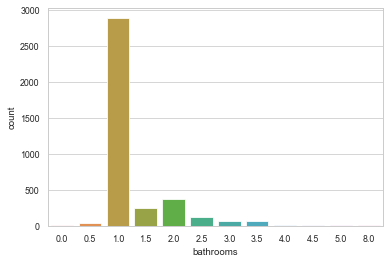

In [96]:
sns.countplot(data['bathrooms'])

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

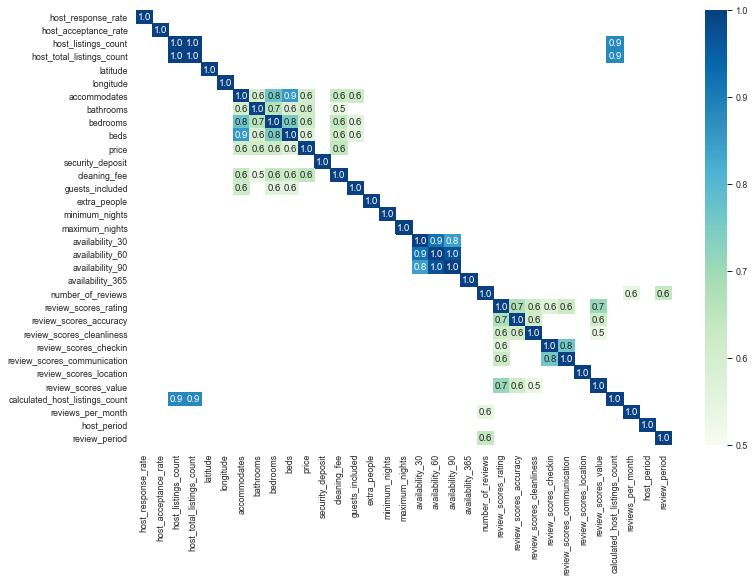

In [134]:
cormat=data.corr()
high_corr_mat=cormat[abs(cormat)>=0.5]
plt.figure(figsize=(12,8))
sns.heatmap(high_corr_mat,annot=True,fmt='.1f',cmap='GnBu',vmin=0.5,vmax=1)


# ANALYSIS
    Most expensive area= Fairmount Park
    Most expensive property= Boat
    Highest number of airbnb listings present in= Westlake
    Most people rent house and/or apartment 
    Most rental properties have one bedroom and one bathroom.
    Price and number of reviews have no correlation.
    Price depends upon number of bedrooms,bathrooms, beds,accomadates and extra people


In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
model1=ols('price~accommodates',data).fit()
print(model1.rsquared) #rsqaured is coefficient of determination

0.4253882424817067


In [21]:
from statsmodels.formula.api import ols
formula2='price~accommodates + C(property_type)' #C() to tell python that this is categorical
model2=ols(formula2,data).fit()
print(model2.rsquared)

0.43941038474986926


In [22]:
anova_test=sm.stats.anova_lm(model1,model2)
print(anova_test)

   df_resid           ssr  df_diff        ss_diff         F        Pr(>F)
0    3816.0  1.786452e+07      0.0            NaN       NaN           NaN
1    3800.0  1.742854e+07     16.0  435980.134142  5.941134  4.439180e-13


In [17]:
data.columns

Index(['last_scraped', 'neighborhood_overview', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_s